In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,580 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and di

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [ ]:
data = pd.read_csv('../content/sample_data/Variables for Clustering.csv', encoding='euc-kr')
data.head(100)

,이름,위도,경도
0,공항시장,37.563001,126.809101
1,까치산시장,37.531527,126.847865
2,남부골목시장,37.533143,126.860646
3,남부화곡시장,37.533066,126.858988
4,대원종합시장,37.544428,126.836465
5,송화골목시장,37.548727,126.835716
6,신월중앙시장,37.528053,126.842345
7,화곡본동시장,37.542868,126.844115
8,화곡중앙골목시장,37.535052,126.839317
9,화곡중앙시장,37.535339,126.839467


[[ 37.55347249 126.85466293]
 [ 37.57711634 126.81173512]
 [ 37.53793372 126.84614843]
 [ 37.57023722 126.84330282]]


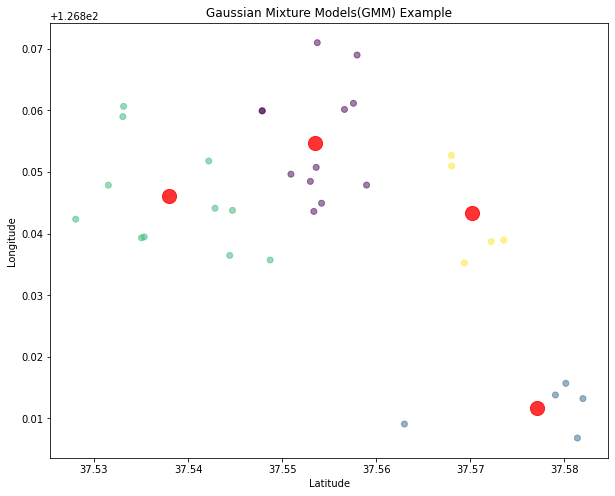

In [ ]:
# 위도와 경도 정보 추출
X = data[['위도', '경도']].values

# GMM 모델 생성 및 학습
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

# 클러스터링 결과 예측
labels = gmm.predict(X)

# 클러스터별 중심점 계산
centers = gmm.means_
print(centers)

# 데이터와 클러스터 결과 시각화
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Gaussian Mixture Models(GMM) Example')
plt.show()

[[ 37.57023745 126.84330184]
 [ 37.53751931 126.84642527]
 [ 37.57711632 126.81173512]
 [ 37.55321985 126.85412734]]


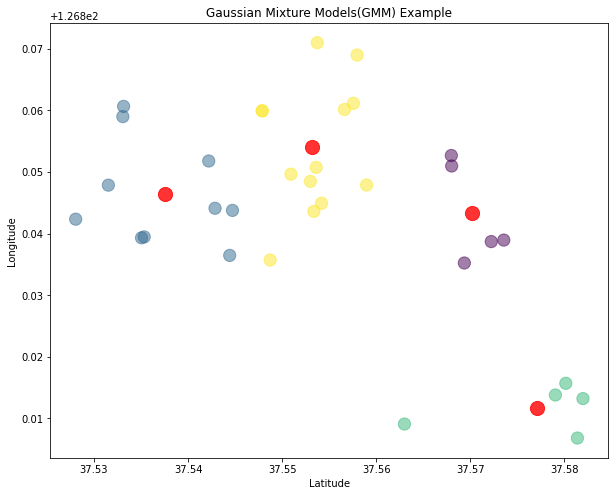

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

df = pd.read_csv('../content/sample_data/Variables for Clustering.csv', encoding='euc-kr')

# 위도와 경도 정보 추출
X = df[['위도', '경도']].values

# GMM 모델 생성 및 학습
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

# 클러스터링 결과 예측
labels = gmm.predict(X)

# 클러스터별 중심점 계산
centers = gmm.means_
print(centers)

# 데이터와 클러스터 결과 시각화
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=150, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Gaussian Mixture Models(GMM) Example')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


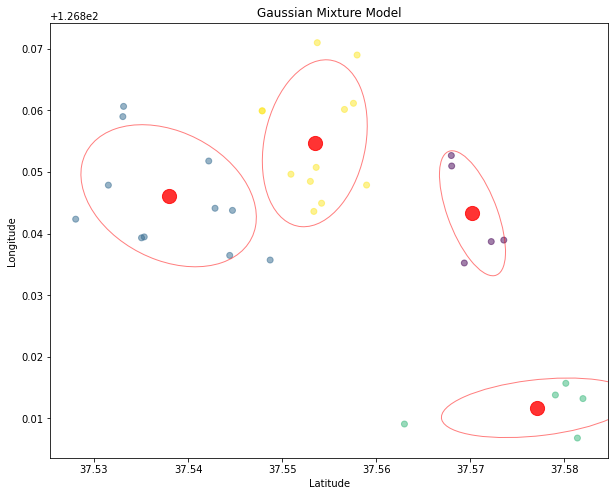

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# 데이터셋 로드
df = pd.read_csv('../content/sample_data/Variables for Clustering.csv', encoding='euc-kr')

# 위도와 경도 정보 추출
X = df[['위도', '경도']].values

# GMM 모델 생성 및 학습
gmm = GaussianMixture(n_components=4)
gmm.fit(df[['위도', '경도']])

# 클러스터링 결과 예측
labels = gmm.predict(X)

# 클러스터별 평균과 공분산 추출
means = gmm.means_
covariances = gmm.covariances_

# 시각화
plt.figure(figsize=(10, 8))

# 데이터 산점도 시각화
plt.scatter(df['위도'], df['경도'], c=labels, cmap='viridis', alpha=0.5)

# 클러스터별 가우시안 분포 시각화
for i, (mean, cov) in enumerate(zip(means, covariances)):
    # 등고선 생성
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = Ellipse(xy=mean, width=v[0], height=v[1],
                  angle=180 + angle, color='red', alpha=0.5)
    ell.set_facecolor('none')
    plt.gca().add_artist(ell)

plt.scatter(means[:, 0], means[:, 1], c='red', s=200, alpha=0.8)    

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Gaussian Mixture Model')
plt.show()

# GMM은 표준 편차 파라미터로 인해, 클러스터는 원으로 제한되기 보다는 타원 모양을 취할 수 있음

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


[[ 37.55094079 126.8208938 ]
 [ 37.53274906 126.84823395]
 [ 37.57637716 126.81431231]
 [ 37.55100227 126.84978559]
 [ 37.55580241 126.83830052]
 [ 37.5599192  126.82478101]
 [ 37.55273732 126.87037911]
 [ 37.56194264 126.81418134]
 [ 37.55034786 126.86163734]
 [ 37.57022057 126.83921655]
 [ 37.54086549 126.83965377]
 [ 37.53576609 126.85477663]
 [ 37.56224216 126.85061311]
 [ 37.57200302 126.80454795]
 [ 37.57075032 126.82096743]]


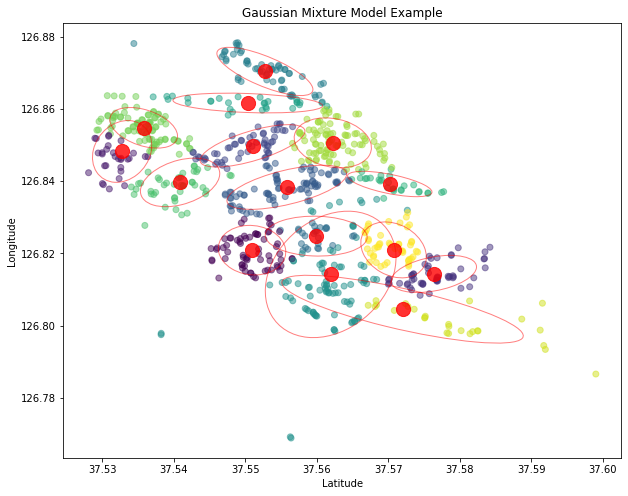

In [ ]:
# 최종

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# 데이터셋 로드
df = pd.read_csv('../content/sample_data/Variables for Clustering ver2.csv', encoding='euc-kr')

# 위도와 경도 정보 추출
X = df[['위도', '경도']].values

# GMM 모델 생성 및 학습
gmm = GaussianMixture(n_components=15)
gmm.fit(df[['위도', '경도']])

# 클러스터링 결과 예측
labels = gmm.predict(X)

# 클러스터별 평균과 공분산 추출
means = gmm.means_
covariances = gmm.covariances_
print(means)

# 시각화
plt.figure(figsize=(10, 8))

# 데이터 산점도 시각화
plt.scatter(df['위도'], df['경도'], c=labels, cmap='viridis', alpha=0.5)

# 클러스터별 가우시안 분포 시각화
for i, (mean, cov) in enumerate(zip(means, covariances)):
    # 등고선 생성
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = Ellipse(xy=mean, width=v[0], height=v[1],
                  angle=180 + angle, color='red', alpha=0.5)
    ell.set_facecolor('none')
    plt.gca().add_artist(ell)

plt.scatter(means[:, 0], means[:, 1], c='red', s=200, alpha=0.8)    

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Gaussian Mixture Model Example')
plt.show()

# GMM은 표준 편차 파라미터로 인해, 클러스터는 원으로 제한되기 보다는 타원 모양을 취할 수 있음